In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_src = pd.read_csv("data/faa_wildlife_strikes.csv", encoding='latin-1', parse_dates=['FlightDate'], dayfirst=True)

In [3]:
#make a copy of the source data
df = df_src.copy()

In [4]:
df

,Cost: Total $,Effect: Amount of damage,Feet above ground,FlightDate,Record ID,Number of Strikes,Country,Origin State,When: Phase of flight,Remarks,Wildlife: Species,Origin State Code,When: Time of day
0,0,NaN,NaN,2007-08-12,249533,1,USA,Illinois,NaN,REMAINS FOUND ON RWY 10 E OF 14R. CLOSED RWY F...,Coyote,IL,Null
1,0,NaN,NaN,2007-08-12,249925,1,USA,Illinois,NaN,REMAINS FOUND ON 4R/22L AT SIERRA 2. PICKED UP...,Mourning dove,IL,Null
2,0,NaN,NaN,2007-08-12,251288,1,USA,North Dakota,NaN,REMAINS FOUND ON RWY DURING ARFLD INSPN. TIME ...,NaN,NaN,NaN
3,0,NaN,NaN,2007-08-12,250945,1,USA,Ohio,NaN,ATCT REPTD A PILOT MAY HAVE STRUCK A BIRD ON 2...,NaN,NaN,NaN
4,0,NaN,NaN,2007-08-12,253699,1,USA,Texas,NaN,REMAINS REPTD TO ATC BY LANDING PILOT. A/C THA...,Mourning dove,TX,Null
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147597,0,None,1000.0,2015-08-25,17949,1,USA,South Carolina,Take-off run,NaN,Bats,SC,Null
147598,0,None,200.0,2015-08-27,17950,1,USA,Missouri,Take-off run,NaN,NaN,MO,Null
147599,0,None,1500.0,2015-09-03,17952,1,USA,New York,Climb,NaN,NaN,NY,Null
147600,0,None,0.0,2015-09-09,17953,1,USA,Missouri,Landing,NaN,NaN,MO,Null


In [5]:
df['Effect: Amount of damage'].replace('None', np.nan, inplace=True)
df['When: Time of day'].replace('Null', np.nan, inplace=True)

In [6]:
df

,Cost: Total $,Effect: Amount of damage,Feet above ground,FlightDate,Record ID,Number of Strikes,Country,Origin State,When: Phase of flight,Remarks,Wildlife: Species,Origin State Code,When: Time of day
0,0,NaN,NaN,2007-08-12,249533,1,USA,Illinois,NaN,REMAINS FOUND ON RWY 10 E OF 14R. CLOSED RWY F...,Coyote,IL,NaN
1,0,NaN,NaN,2007-08-12,249925,1,USA,Illinois,NaN,REMAINS FOUND ON 4R/22L AT SIERRA 2. PICKED UP...,Mourning dove,IL,NaN
2,0,NaN,NaN,2007-08-12,251288,1,USA,North Dakota,NaN,REMAINS FOUND ON RWY DURING ARFLD INSPN. TIME ...,NaN,NaN,NaN
3,0,NaN,NaN,2007-08-12,250945,1,USA,Ohio,NaN,ATCT REPTD A PILOT MAY HAVE STRUCK A BIRD ON 2...,NaN,NaN,NaN
4,0,NaN,NaN,2007-08-12,253699,1,USA,Texas,NaN,REMAINS REPTD TO ATC BY LANDING PILOT. A/C THA...,Mourning dove,TX,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147597,0,NaN,1000.0,2015-08-25,17949,1,USA,South Carolina,Take-off run,NaN,Bats,SC,NaN
147598,0,NaN,200.0,2015-08-27,17950,1,USA,Missouri,Take-off run,NaN,NaN,MO,NaN
147599,0,NaN,1500.0,2015-09-03,17952,1,USA,New York,Climb,NaN,NaN,NY,NaN
147600,0,NaN,0.0,2015-09-09,17953,1,USA,Missouri,Landing,NaN,NaN,MO,NaN


In [7]:
df.dtypes

Cost: Total $                       object
Effect: Amount of damage            object
Feet above ground                  float64
FlightDate                  datetime64[ns]
Record ID                            int64
Number of Strikes                    int64
Country                             object
Origin State                        object
When: Phase of flight               object
Remarks                             object
Wildlife: Species                   object
Origin State Code                   object
When: Time of day                   object
dtype: object

In [8]:
#replace invalid numeric values
df["Cost: Total $"] = df["Cost: Total $"].str.replace(',','')

In [9]:
df["Cost: Total $"] = pd.to_numeric(df["Cost: Total $"])
df["Number of Strikes"] = pd.to_numeric(df["Number of Strikes"])

In [10]:
#fill out the missing state abbreviations
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


df['Origin State Code'] = df['Origin State'].map(us_state_abbrev).fillna(df['Origin State'])

In [11]:
df.dtypes

Cost: Total $                        int64
Effect: Amount of damage            object
Feet above ground                  float64
FlightDate                  datetime64[ns]
Record ID                            int64
Number of Strikes                    int64
Country                             object
Origin State                        object
When: Phase of flight               object
Remarks                             object
Wildlife: Species                   object
Origin State Code                   object
When: Time of day                   object
dtype: object

In [14]:
import sqlite3
conn = sqlite3.connect(r"pythonsqlite.db")
df.to_sql('faa_wildlife_strikes_tbl', conn, if_exists='replace', index=False)
pd.read_sql('select * from faa_wildlife_strikes_tbl', conn)

,Cost: Total $,Effect: Amount of damage,Feet above ground,FlightDate,Record ID,Number of Strikes,Country,Origin State,When: Phase of flight,Remarks,Wildlife: Species,Origin State Code,When: Time of day
0,0,None,NaN,2007-08-12 00:00:00,249533,1,USA,Illinois,None,REMAINS FOUND ON RWY 10 E OF 14R. CLOSED RWY F...,Coyote,IL,None
1,0,None,NaN,2007-08-12 00:00:00,249925,1,USA,Illinois,None,REMAINS FOUND ON 4R/22L AT SIERRA 2. PICKED UP...,Mourning dove,IL,None
2,0,None,NaN,2007-08-12 00:00:00,251288,1,USA,North Dakota,None,REMAINS FOUND ON RWY DURING ARFLD INSPN. TIME ...,None,ND,None
3,0,None,NaN,2007-08-12 00:00:00,250945,1,USA,Ohio,None,ATCT REPTD A PILOT MAY HAVE STRUCK A BIRD ON 2...,None,OH,None
4,0,None,NaN,2007-08-12 00:00:00,253699,1,USA,Texas,None,REMAINS REPTD TO ATC BY LANDING PILOT. A/C THA...,Mourning dove,TX,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147597,0,None,1000.0,2015-08-25 00:00:00,17949,1,USA,South Carolina,Take-off run,None,Bats,SC,None
147598,0,None,200.0,2015-08-27 00:00:00,17950,1,USA,Missouri,Take-off run,None,None,MO,None
147599,0,None,1500.0,2015-09-03 00:00:00,17952,1,USA,New York,Climb,None,None,NY,None
147600,0,None,0.0,2015-09-09 00:00:00,17953,1,USA,Missouri,Landing,None,None,MO,None


In [15]:
#Which year had the most wildlife strikes that caused damage to the aircraft

query = """select strftime('%Y',FlightDate) as 'Year', 
           sum("Number of Strikes") as 'Total Number of Strikes w Damage'
            FROM faa_wildlife_strikes_tbl 
            WHERE "Cost: Total $" > 0
            Group By 1
            ORDER BY 2 DESC
"""

pd.read_sql(query, conn)

,Year,Total Number of Strikes w Damage
0,2013,370
1,2014,358
2,2012,337
3,2011,266
4,2000,243
5,2009,239
6,2005,218
7,2008,215
8,2010,212
9,2007,196


In [16]:
#How wildlife strikes are developing over time. What about the damage caused by the strikes?
query = """select strftime('%Y',FlightDate) as 'Year', 
           sum("Number of Strikes") as 'Total Number of Strikes',
           sum("Cost: Total $") as 'Total Cost $'
            FROM faa_wildlife_strikes_tbl 
            Group By 1
            ORDER BY 1 
"""

stats_by_year = pd.read_sql(query, conn)
stats_by_year

,Year,Total Number of Strikes,Total Cost $
0,1990,1907,8467260
1,1991,2457,5141323
2,1992,2638,22601434
3,1993,2705,11761675
4,1994,2763,10557240
5,1995,2743,39400771
6,1996,2951,6710856
7,1997,3287,11519939
8,1998,3770,20134019
9,1999,4314,22356601


In [17]:
query = """select strftime('%Y-%m',FlightDate) as 'YearMonth', 
           sum("Number of Strikes") as 'Total Number of Strikes',
           sum("Cost: Total $") as 'Total Cost $'
            FROM faa_wildlife_strikes_tbl 
            Group By 1
            ORDER BY 1 
"""

stats_by_year_month = pd.read_sql(query, conn)

In [18]:
#When most wildlife strikes occur by phase of flight
query = """select "When: Phase of flight", 
           sum("Number of Strikes") as 'Total Number of Strikes'
            FROM faa_wildlife_strikes_tbl 
            Group By 1
            ORDER BY "Total Number of Strikes" DESC
"""
pd.read_sql(query, conn)

,When: Phase of flight,Total Number of Strikes
0,Approach,45694
1,None,38475
2,Take-off run,20529
3,Landing Roll,19798
4,Climb,18374
5,Descent,2992
6,Landing,621
7,Taxi,368
8,Departure,301
9,Local,279


In [19]:
#When most wildlife strikes occur by time of day
query = """select "When: Time of day", 
           sum("Number of Strikes") as 'Total Number of Strikes'
            FROM faa_wildlife_strikes_tbl 
            Group By 1
            ORDER BY "Total Number of Strikes" DESC
"""
pd.read_sql(query, conn)

,When: Time of day,Total Number of Strikes
0,None,71444
1,Day,47957
2,Night,22221
3,Dusk,3468
4,Dawn,2512


In [20]:
def lineplot(x_data, y_data, x_last, y_last, x_label="", y_label="", title="", ann_x=0, ann_y=0, ann_text_x=0, ann_text_y=0):
    # Create the plot object
    _, ax = plt.subplots(figsize=(20,10))

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, color = '#539caf', linewidth=4, alpha = 1, marker='h', markerfacecolor='lightgreen', markeredgewidth=2,
         markersize=12)
    ax.plot(x_last, y_last, color = 'red', linestyle='dashed', linewidth=4, alpha = 1, marker='h', markerfacecolor='lightgreen', markeredgewidth=2,
         markersize=12)
    #ax.annotate('peak', xy=(3.5, 2.5), xytext=(4, 4), fontsize=12,
            #arrowprops=dict(facecolor='black', shrink=0.05))
        
    ax.tick_params(axis='y', which='major', labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=13)   
    #ax.text(20,40,'This text starts at point (2,4)')
    # Label the axes and provide a title
    ax.set_title(title, fontsize=22)
    ax.set_xlabel(x_label, fontsize=18)
    ax.set_ylabel(y_label, fontsize=18)
    ax.annotate('Partial/missing data', xy=(ann_x, ann_y), xytext=(ann_text_x, ann_text_y),fontsize=18,
            arrowprops=dict(facecolor='black', shrink=0.05))
    #ax.text(23, 4500, 'boxed italics text in data coords', style='italic',
        #bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
    

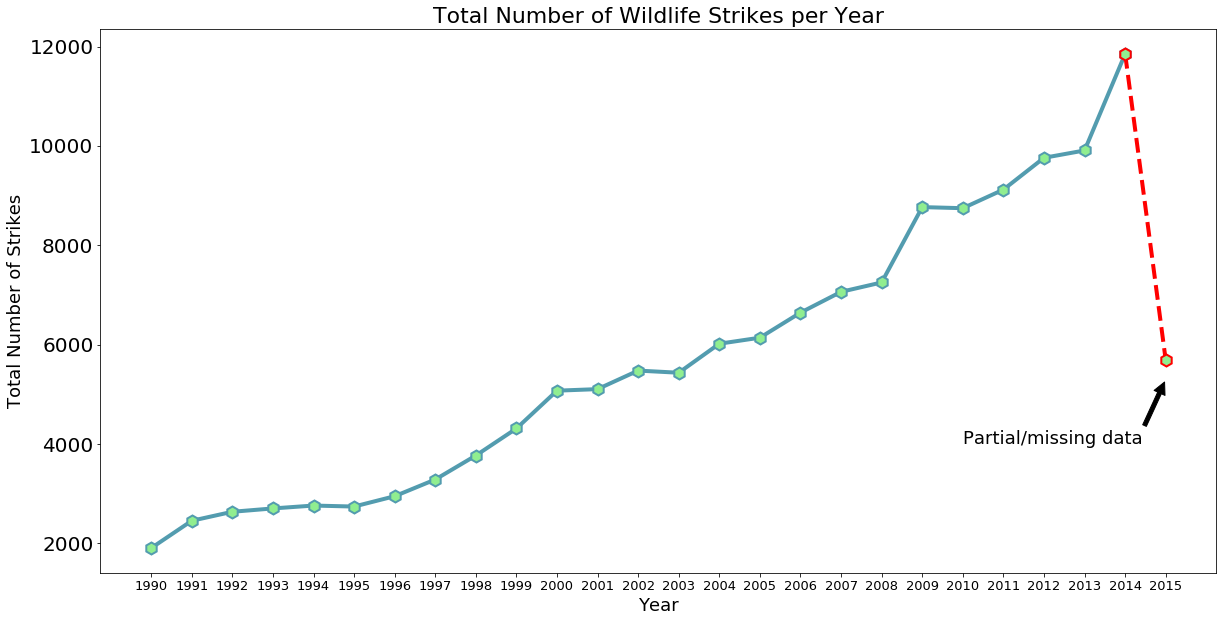

In [21]:
all_other_years = stats_by_year[stats_by_year['Year'] < '2015']
year_2015 = stats_by_year[stats_by_year['Year'] >= '2014']

x_data = all_other_years['Year'].values
y_data = all_other_years['Total Number of Strikes'].values

x_last = year_2015['Year'].values
y_last = year_2015['Total Number of Strikes'].values


lineplot(x_data, y_data, x_last, y_last, x_label="Year", y_label="Total Number of Strikes", 
         title="Total Number of Wildlife Strikes per Year", ann_x = 25, ann_y = 5300, 
         ann_text_x = 20, ann_text_y = 4000)

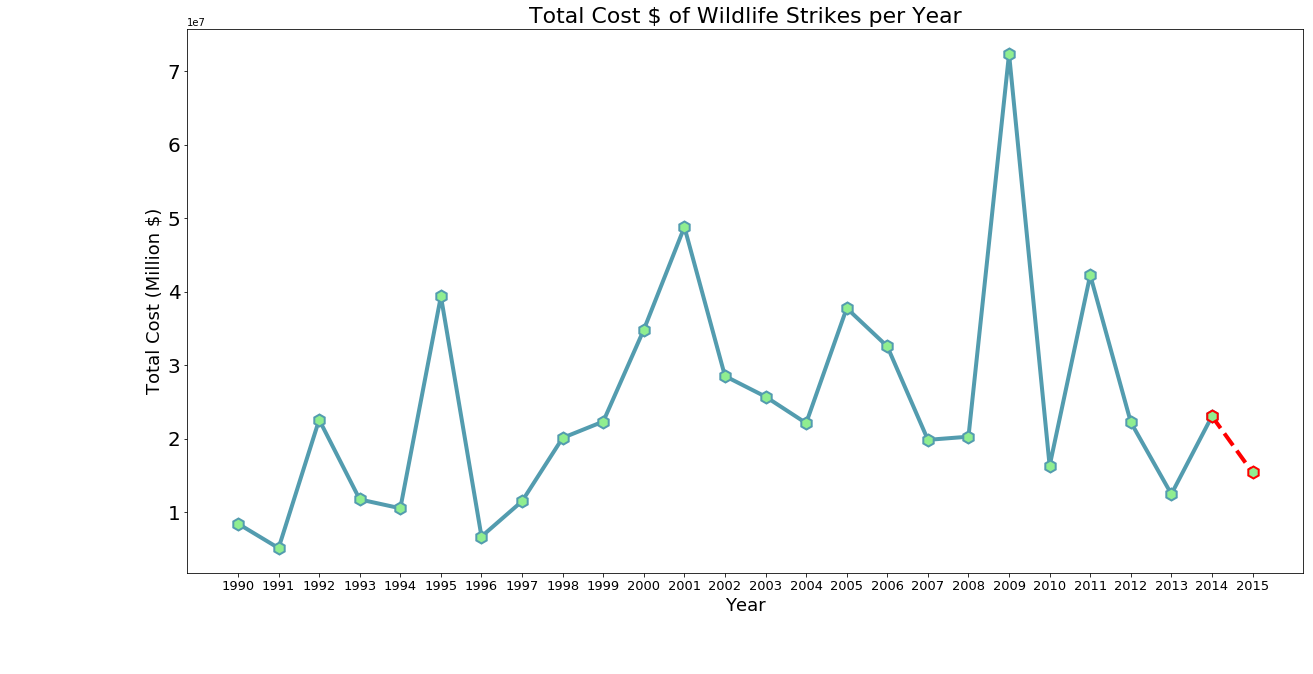

In [22]:
all_other_years = stats_by_year[stats_by_year['Year'] < '2015']
year_2015 = stats_by_year[stats_by_year['Year'] >= '2014']

x_data = all_other_years['Year'].values
y_data = all_other_years['Total Cost $'].values

x_last = year_2015['Year'].values
y_last = year_2015['Total Cost $'].values


lineplot(x_data, y_data, x_last, y_last, x_label="Year", y_label="Total Cost (Million $)", 
         title="Total Cost $ of Wildlife Strikes per Year")

In [23]:
#How wildlife strikes are developing over time. What about the damage caused by the strikes?
#analysis by month
query = """select strftime('%Y',FlightDate) as 'Year', 
           strftime('%m',FlightDate) as 'Month', 
           sum("Number of Strikes") as 'Total Number of Strikes',
           sum("Cost: Total $") as 'Total Cost $'
            FROM faa_wildlife_strikes_tbl 
            Group By 1,2
            ORDER BY 1,2
"""

stats_by_year_month = pd.read_sql(query, conn)
stats_by_year_month["Year"] = pd.to_numeric(stats_by_year_month["Year"])
stats_by_year_month["Month"] = pd.to_numeric(stats_by_year_month["Month"])
stats_by_year_month.dtypes


Year                       int64
Month                      int64
Total Number of Strikes    int64
Total Cost $               int64
dtype: object

Text(0.5,1,'Number of All Wildlife Strikes')

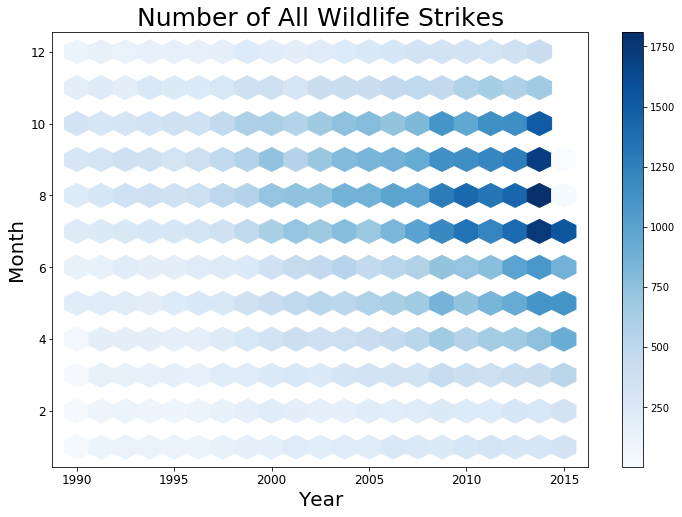

In [29]:
stats_by_year_month.plot(
    kind='hexbin',
    x='Year',
    y='Month',
    C='Total Number of Strikes',
    legend=True,
    gridsize=20,
    figsize=(12,8),
    fontsize = 12,
    cmap="Blues", # defaults to greenish
    sharex=False # required to get rid of a bug
)

plt.xlabel('Year', size = 20)
plt.ylabel('Month', size = 20)
plt.title('Number of All Wildlife Strikes', size = 25)

Text(0.5,1,'Total Cost (Million $)')

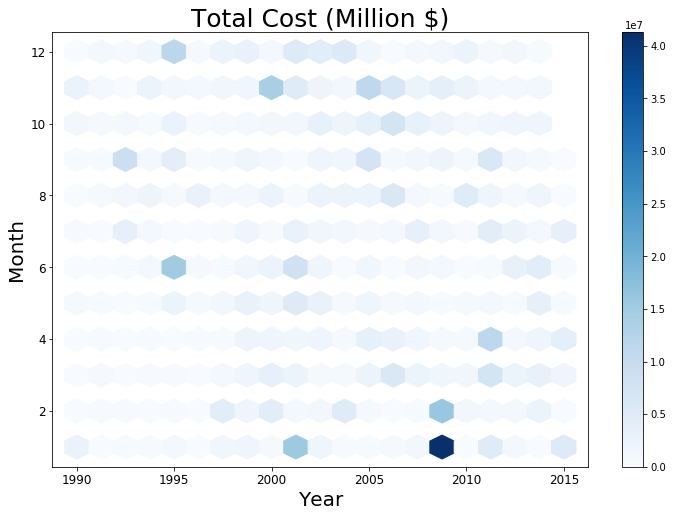

In [32]:
stats_by_year_month.plot(
    kind='hexbin',
    x='Year',
    y='Month',
    C='Total Cost $',
    gridsize=20,
    figsize=(12,8),
    fontsize = 12,
    cmap="Blues", # defaults to greenish
    sharex=False # required to get rid of a bug
)

plt.xlabel('Year', size = 20)
plt.ylabel('Month', size = 20)
plt.title('Total Cost (Million $)', size = 25)

In [26]:
#When most wildlife strikes occur by time of day
query = """select "Origin State Code" as state, 
           sum("Number of Strikes") as 'Total Number of Strikes'
            FROM faa_wildlife_strikes_tbl 
            where state <> 'None'
            Group By 1
            ORDER BY "Total Number of Strikes" DESC
"""
strikes_by_state = pd.read_sql(query, conn)

In [33]:
import plotly.express as px  # Be sure to import express
fig = px.choropleth(strikes_by_state,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="Total Number of Strikes",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Number of Total Strikes, Years 1990 - 2015', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

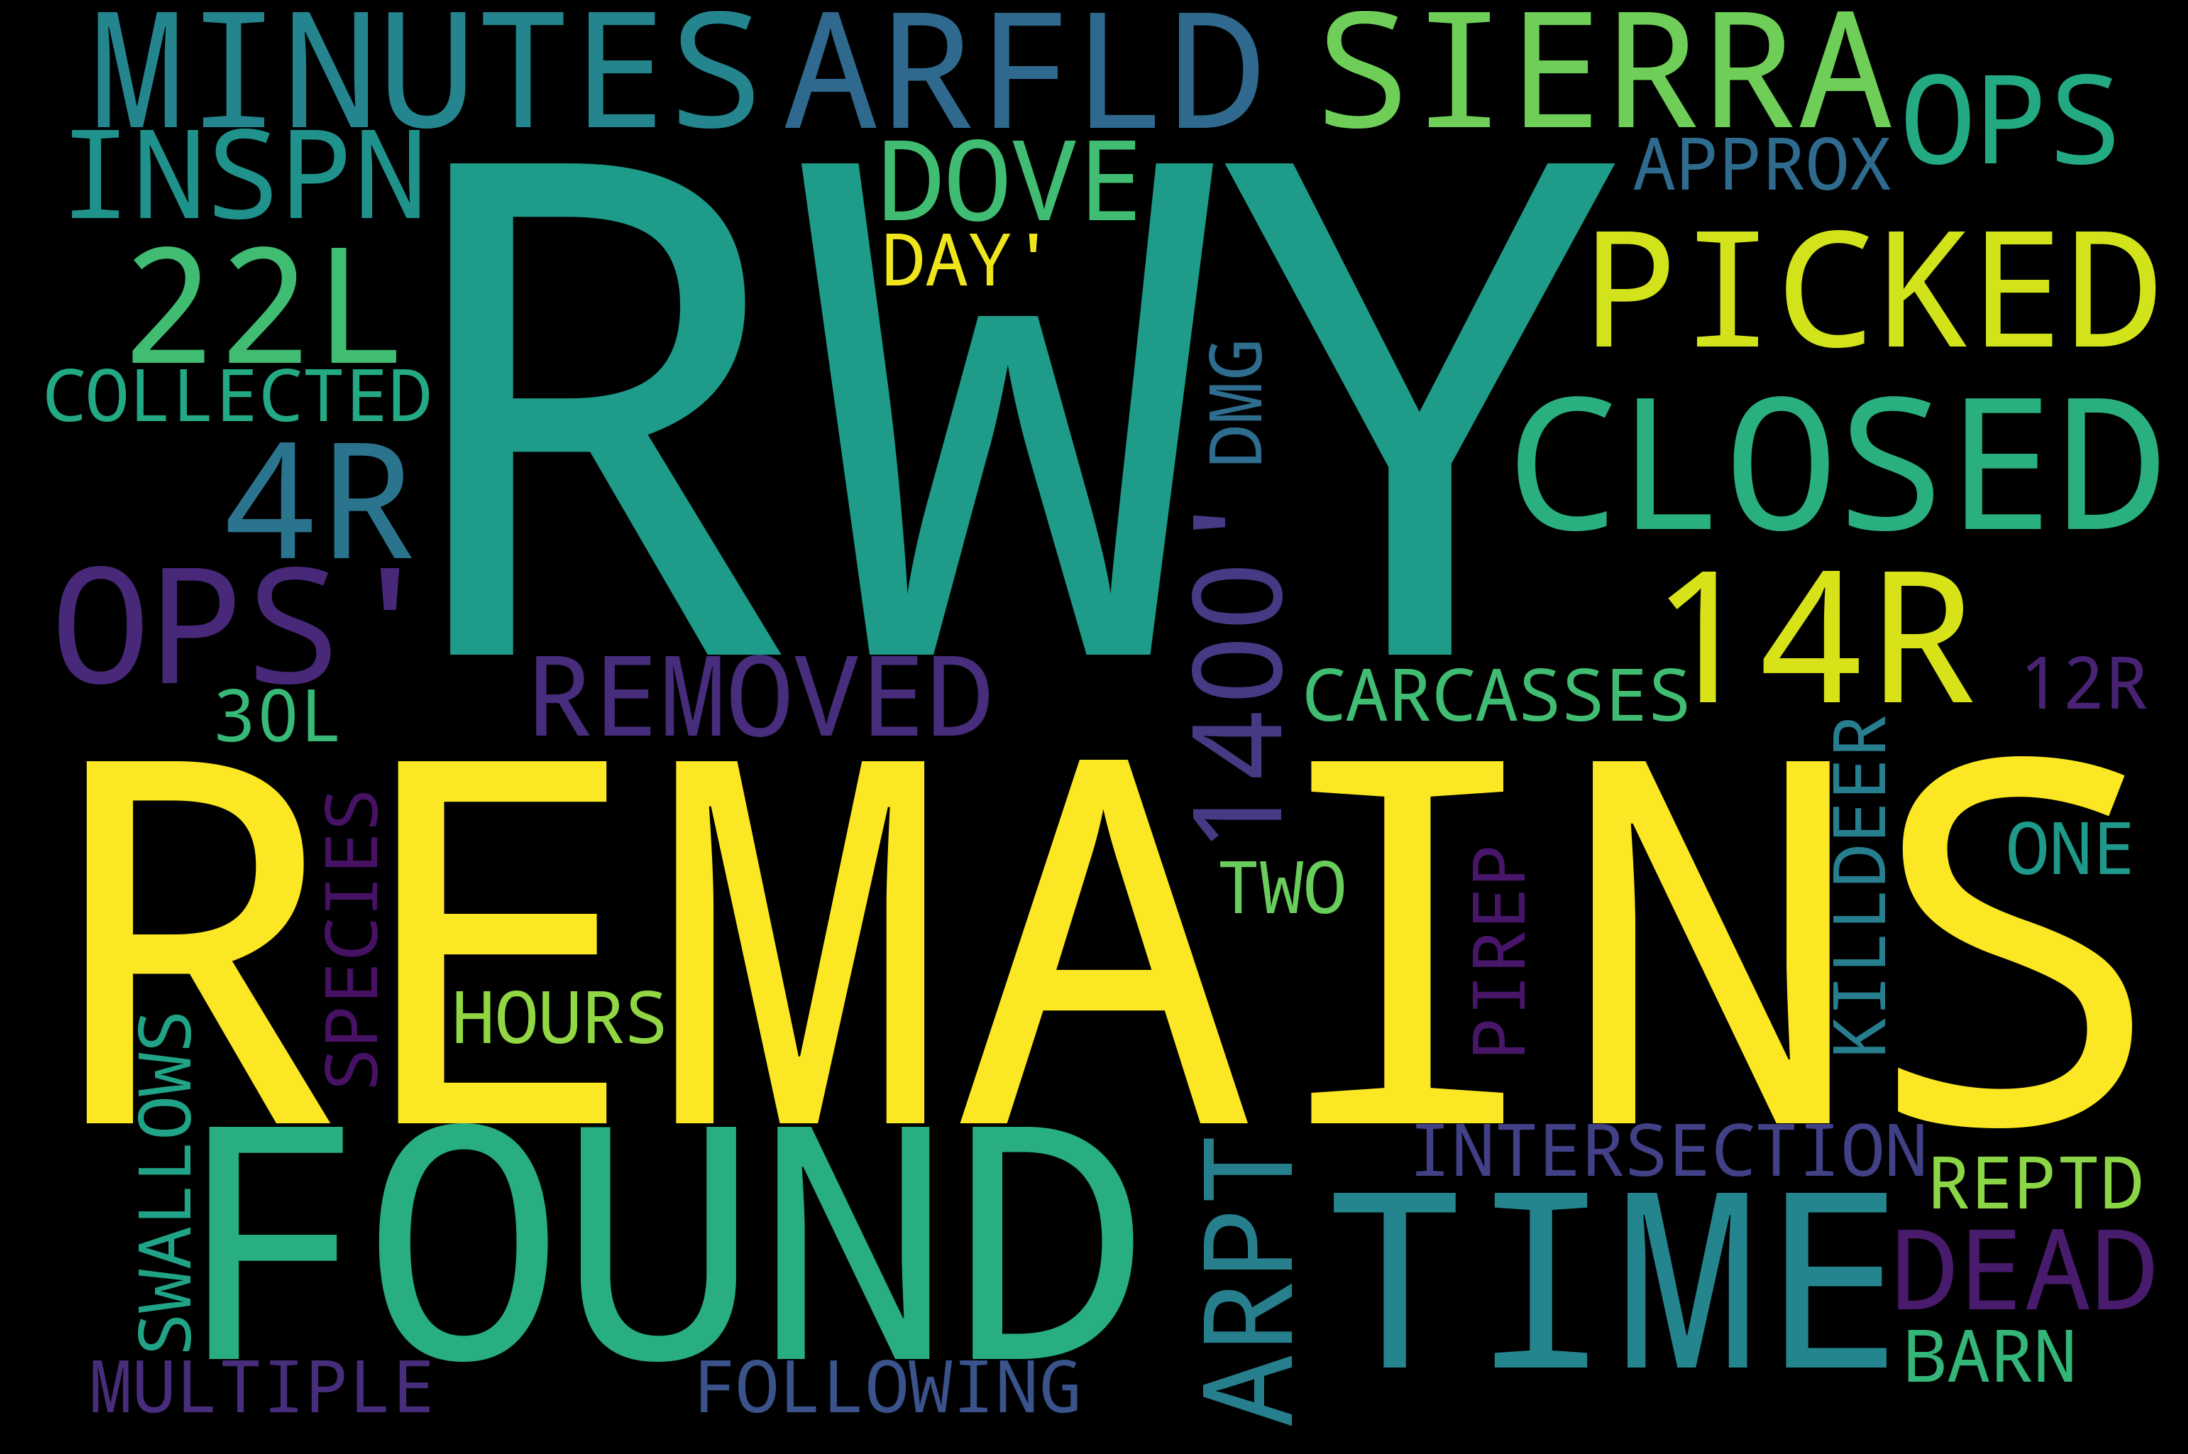

In [35]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df[df['Remarks'].notnull()].Remarks.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    max_words=100,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()